#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia de datos**
###Tecnológico de Monterrey

Actividad Semanal 5

**Realiza el ejercicio Feature Importances**

###**Nombre del estudiante: Gustavo René Ramos Ojeda
###**Matrícula: A01793599


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [96]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig


# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print()
print()
print(vectors) #W
print()

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(W,D)
B= np.dot(B,Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]


[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [97]:
# Reconstruyendo la Matriz #1

# Definiendo la matriz
A = array([[3, 0, 2], [3, 0, -2], [0, 0, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# Calcular la eigendescomposición
values, vectors = eig(A)
print(values) #D
print()
print()
print(vectors) #W
print()

# Reconstruyendo la matriz

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")

# Multiplicando matrices
B= np.dot(np.dot(W,D) ,Winv)
print(B.round(0))
print("-----------------------------")


-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  0  1]]
-----------------------------
[0. 3. 1.]


[[ 0.          0.70710678 -0.19245009]
 [ 1.          0.70710678 -0.96225045]
 [ 0.          0.          0.19245009]]

-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  0.  1.]]
-----------------------------


In [98]:
# Reconstruyendo la Matriz #2

# Definiendo la matriz
A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# Calcular la eigendescomposición
values, vectors = eig(A)
print(values) #D
print()
print()
print(vectors) #W
print()

# Reconstruyendo la matriz

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")

# Multiplicando matrices
B= np.dot(np.dot(W,D) ,Winv)
print(B.round(0))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]


[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]

-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [99]:
# Reconstruyendo la Matriz #3

# Definiendo la matriz
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# Calcular la eigendescomposición
values, vectors = eig(A)
print(values) #D
print()
print()
print(vectors) #W
print()

# Reconstruyendo la matriz

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")

# Multiplicando matrices
B= np.dot(np.dot(W,D) ,Winv)
print(B.round(0))
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]


[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]

-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


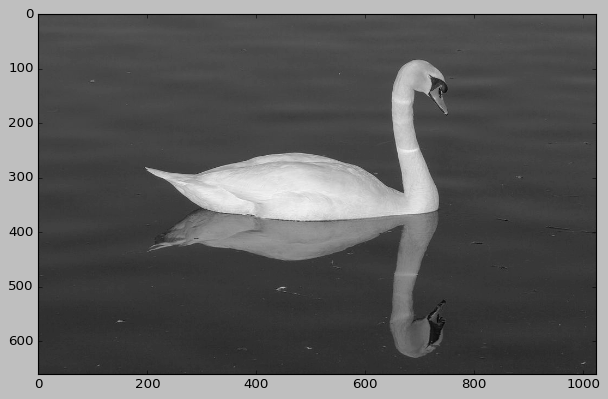

<PIL.Image.Image image mode=LA size=1024x660 at 0x1E5B52E8CA0>


In [100]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [101]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [102]:
U.shape

(660, 660)

In [103]:
V.shape

(1024, 1024)

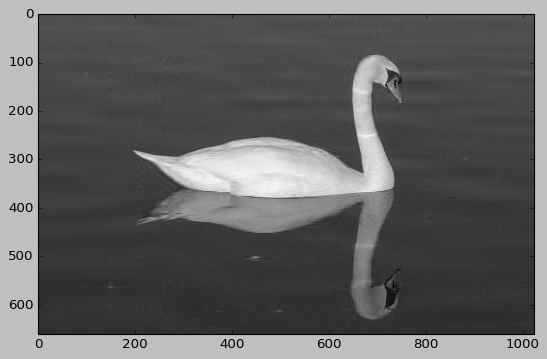

Felicidades la imagen está comprimida


In [104]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 32.  32.  32. ... 147. 151. 137.]


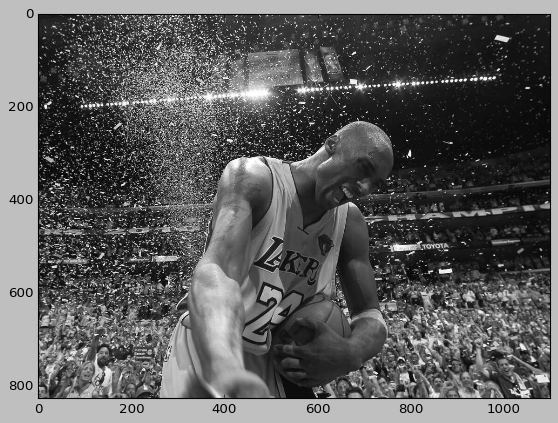

<PIL.Image.Image image mode=LA size=1100x825 at 0x1E5B520DF60>


In [105]:
# Comprimiendo imagen #1

plt.style.use('classic')
img = Image.open("kobe1.jpg").convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [106]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(825, 1100)

In [107]:
U.shape

(825, 825)

In [108]:
V.shape

(1100, 1100)

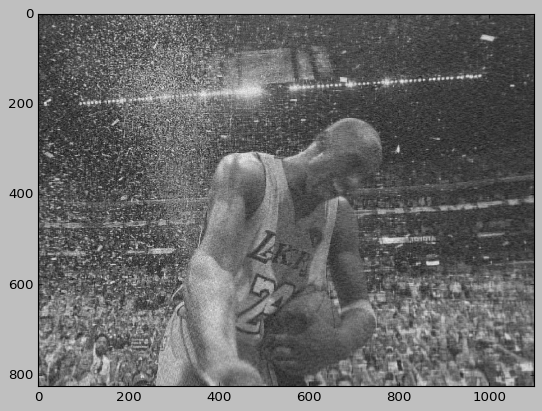

Felicidades la imagen está comprimida


In [109]:
# Estableciendo nvalues para disminuir compresión
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[  7.   7.   7. ... 141. 138. 137.]


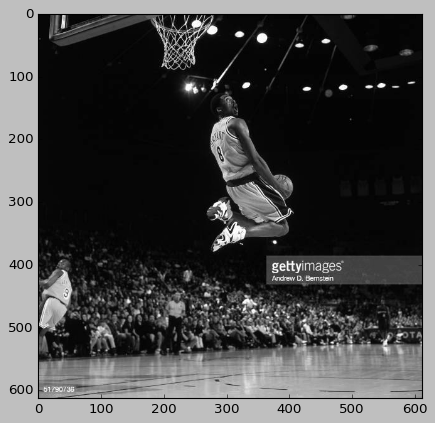

<PIL.Image.Image image mode=LA size=612x612 at 0x1E5B5907610>


In [110]:
# Comprimiendo imagen #2

plt.style.use('classic')
img = Image.open("kobe2.jpg").convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [111]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(612, 612)

In [112]:
U.shape

(612, 612)

In [113]:
V.shape

(612, 612)

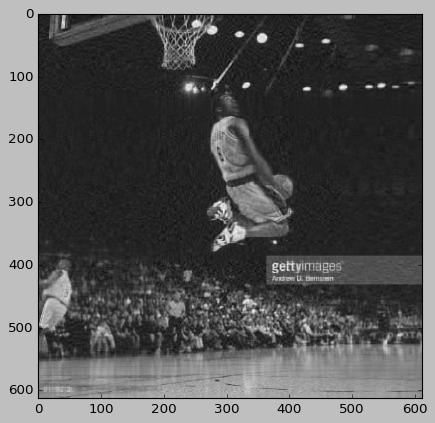

Felicidades la imagen está comprimida


In [114]:
# Estableciendo nvalues para disminuir compresión
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[0. 0. 0. ... 0. 0. 0.]


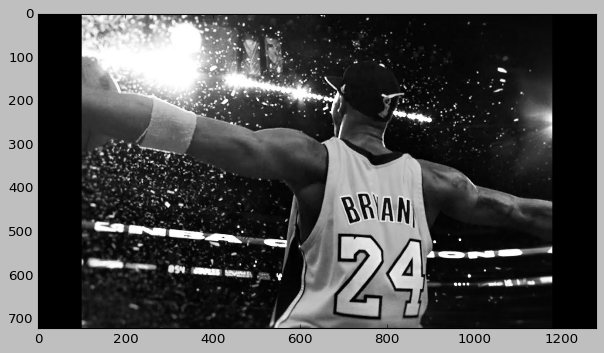

<PIL.Image.Image image mode=LA size=1280x720 at 0x1E5B4E92890>


In [115]:
# Comprimiendo imagen #3

plt.style.use('classic')
img = Image.open("kobe3.jpg").convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [116]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(720, 1280)

In [117]:
U.shape

(720, 720)

In [118]:
V.shape

(1280, 1280)

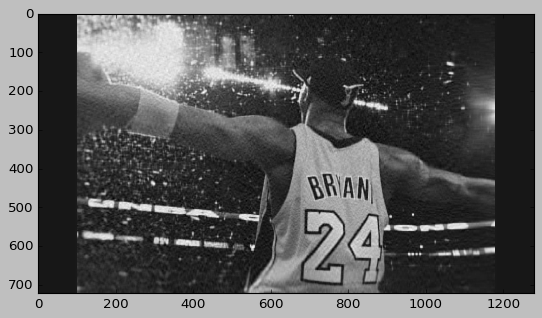

Felicidades la imagen está comprimida


In [119]:
# Estableciendo nvalues para disminuir compresión
nvalue = 75
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




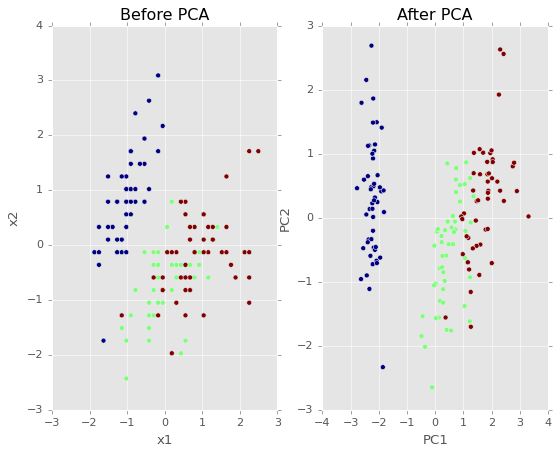

In [120]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

pcaTotal = PCA(n_components=4)
X_total = pcaTotal.fit_transform(X)

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


In [121]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Esto demuestra de inicio que con solo los primeros 2 PCAs tenemos el 95.81% de del total de la varianza

In [122]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcaTotal.explained_variance_),
                            'Proportion of variance': pcaTotal.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pcaTotal.explained_variance_ratio_)#column
                            })
                            
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1','PC2','PC3','PC4']
pcsSummary = pcsSummary.round(4)
print(pcsSummary)

                           PC1     PC2     PC3     PC4
Standard deviation      1.7141  0.9593  0.3844  0.1444
Proportion of variance  0.7296  0.2285  0.0367  0.0052
Cumulative proportion   0.7296  0.9581  0.9948  1.0000


Esta matriz nos permite observar que realmente a partir del PC3 solo obtenemos el 4.19% de todo el conjunto

In [123]:
np.cov(X_new.T)

array([[ 2.93808505e+00, -1.90749728e-16],
       [-1.90749728e-16,  9.20164904e-01]])

In [124]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [125]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [126]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

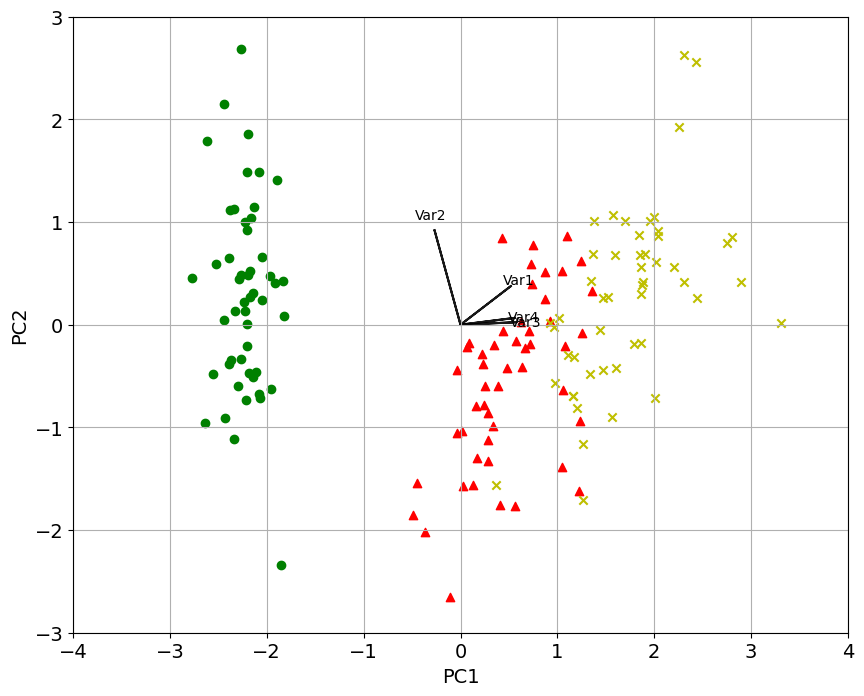

In [127]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [128]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027961

In [129]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.4284401043305398

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

1.	**¿Qué es feature importance y para que nos sirve?**
*    El artículo nos introduce al concepto de PCA (Análisis de los componentes principales) la cual se define como una técnica de reducción de dimensiones que permite obtener características de un set de datos, de ahí que el concepto de Feature Importance indica la importancia que tienen dichas características de un set de datos y con esto se puede identificar aquellas variables que pueden ofrecer más valor a cada componente principal (PC).
*    El principio básico del método Lineal de PCA consiste en transformar linealmente un conjunto de variables correlacionadas en un número menor de variables no correlacionadas, lo que resulta en un set reducido en dimensiones.

2.   ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
*   En mi opinión, el poder alterar una imagen a través de la reducción de información y manteniendo la esencia de la imagen fue muy revelador, ya que al final se puede conocer cuáles son los procedimientos que ocurren atrás cuando se realiza un mecanismo de compresión. Una práctica muy útil.

3.   ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
*   Definitivamente hay mucha utilidad en la reducción de dimensiones, por ejemplo considero que un proceso de reducción podría ayudar por ejemplo en la información que se transmite desde una sucursal bancaria a una central, o en el manejo de los elementos biométricos de nuestros clientes.
